In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

# loading the dataset
df = pd.read_csv('Alternative_Fueling_Stations.csv')

df.head()

,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y
0,1,private,NaN,NaN,NaN,10/11/2024 12:00:00 AM,NaN,CNG,Private,17.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-86.267021,32.367916
1,2,private,NaN,GOVERNMENT,NaN,2/12/2024 12:00:00 AM,NaN,CNG,Private - Government only,45.0,...,NaN,Privé - Réservé au gouvernement,NaN,NaN,NaN,NaN,NaN,NaN,-84.367461,33.821911
2,3,private,NaN,NaN,NaN,12/13/2023 12:00:00 AM,NaN,CNG,Private,64.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-84.543822,33.760256
3,4,public,24 hours daily,CREDIT_CARD_ALWAYS,CREDIT M V Voyager,4/14/2024 12:00:00 AM,NaN,CNG,Public - Credit card at all times,73.0,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-94.375338,35.362213
4,5,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,12/10/2024 12:00:00 AM,NaN,CNG,Public - Credit card at all times,81.0,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-71.026549,42.374706


In [3]:
df.columns

Index(['OBJECTID', 'access_code', 'access_days_time', 'access_detail_code',
       'cards_accepted', 'date_last_confirmed', 'expected_date',
       'fuel_type_code', 'groups_with_access_code', 'id',
       'maximum_vehicle_class', 'open_date', 'owner_type_code',
       'restricted_access', 'status_code', 'funding_sources', 'facility_type',
       'station_name', 'station_phone', 'updated_at', 'geocode_status',
       'latitude', 'longitude', 'city', 'country', 'intersection_directions',
       'plus4', 'state', 'street_address', 'zip', 'bd_blends',
       'cng_dispenser_num', 'cng_fill_type_code', 'cng_has_rng', 'cng_psi',
       'cng_renewable_source', 'cng_total_compression', 'cng_total_storage',
       'cng_vehicle_class', 'e85_blender_pump', 'e85_other_ethanol_blends',
       'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
       'ev_level2_evse_num', 'ev_network', 'ev_network_web', 'ev_other_evse',
       'ev_pricing', 'ev_renewable_source', 'ev_workplace_charging',


## 1. Data cleaning

### a. Filtering for only ev's

In [4]:
df['fuel_type_code'].unique()

array(['CNG', 'E85', 'ELEC', 'LNG', 'LPG', 'BD', 'HY', 'RD', nan],
      dtype=object)

My main focus is on the evs so i filter the dataset to only exclude the other types.

In [5]:
df = df[df['fuel_type_code'] == 'ELEC']
df.head()

,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y
125,126,private,Fleet use only,NaN,NaN,9/14/2023 12:00:00 AM,NaN,ELEC,Private,1517.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.387971,34.248319
126,127,public,5:30am-9pm; pay lot,NaN,NaN,1/10/2023 12:00:00 AM,NaN,ELEC,Public,1523.0,...,NaN,Public,NaN,NaN,NaN,NaN,NaN,NaN,-118.271387,34.040539
127,128,private,For fleet and employee use only,NaN,NaN,9/14/2023 12:00:00 AM,NaN,ELEC,Private,1525.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.248589,34.059133
128,129,private,Fleet use only,NaN,NaN,1/9/2024 12:00:00 AM,NaN,ELEC,Private,1531.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.096665,33.759802
129,130,private,Fleet use only,NaN,NaN,1/9/2024 12:00:00 AM,NaN,ELEC,Private,1552.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.265628,33.770508


### b. Missing values

In [6]:
missing_series = df.isna().sum().sort_values(ascending=False) / len(df) * 100
missing_series

e85_other_ethanol_blends     100.0
cng_vehicle_class            100.0
rd_blends                    100.0
rd_blended_with_biodiesel    100.0
ng_psi                       100.0
                             ...  
latitude                       0.0
longitude                      0.0
country                        0.0
state                          0.0
OBJECTID                       0.0
Length: 80, dtype: float64



After filtering the dataset, many columns contained missing values. To ensure data quality, I set a threshold of **20% missing values**. Any columns exceeding this threshold were **removed** to maintain a more reliable and useful dataset.


In [7]:
for index, value in missing_series.items():
    # threshold is 20% for missing values
    if value >= 20:
        df.drop(index, axis=1, inplace=True)

df.isna().sum()

OBJECTID                          0
access_code                       0
access_days_time               8095
date_last_confirmed             107
fuel_type_code                    0
groups_with_access_code           0
id                                0
open_date                       452
status_code                       0
station_name                      1
station_phone                  4219
updated_at                        0
geocode_status                    4
latitude                          0
longitude                         0
city                              3
country                           0
state                             0
street_address                   32
zip                            3685
ev_connector_types             3723
ev_level2_evse_num            15633
ev_network                     3702
ev_network_web                13407
ev_workplace_charging          3710
groups_with_access_code_fr     3685
x                              3685
y                           

There are still some missing values, we now explore more to figure out how to handle the missing values and also avoid losing alot of information.

In [8]:
df.head(20)

,OBJECTID,access_code,access_days_time,date_last_confirmed,fuel_type_code,groups_with_access_code,id,open_date,status_code,station_name,...,street_address,zip,ev_connector_types,ev_level2_evse_num,ev_network,ev_network_web,ev_workplace_charging,groups_with_access_code_fr,x,y
125,126,private,Fleet use only,9/14/2023 12:00:00 AM,ELEC,Private,1517.0,10/15/1999 12:00:00 AM,E,LADWP - Truesdale Center,...,11797 Truesdale St,91352,"[""CHADEMO"",""J1772"",""J1772COMBO""]",57.0,SHELL_RECHARGE,https://www.shell.us/motorist/electric-vehicle...,1.0,Privé,-118.387971,34.248319
126,127,public,5:30am-9pm; pay lot,1/10/2023 12:00:00 AM,ELEC,Public,1523.0,8/30/1995 12:00:00 AM,E,Los Angeles Convention Center,...,1201 S Figueroa St,90015,"[""""J1772""""]",7.0,Non-Networked,NaN,0.0,Public,-118.271387,34.040539
127,128,private,For fleet and employee use only,9/14/2023 12:00:00 AM,ELEC,Private,1525.0,10/15/1999 12:00:00 AM,E,LADWP - John Ferraro Building,...,111 N Hope St,90012,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,NaN,1.0,Privé,-118.248589,34.059133
128,129,private,Fleet use only,1/9/2024 12:00:00 AM,ELEC,Private,1531.0,5/1/2018 12:00:00 AM,E,LADWP - Haynes Power Plant,...,6801 E 2nd St,90803,"[""CHADEMO"",""J1772"",""J1772COMBO""]",19.0,Non-Networked,NaN,1.0,Privé,-118.096665,33.759802
129,130,private,Fleet use only,1/9/2024 12:00:00 AM,ELEC,Private,1552.0,10/15/1999 12:00:00 AM,E,LADWP - Harbor Generating Station,...,161 N Island Ave,90744,"[""""J1772""""]",10.0,Non-Networked,NaN,1.0,Privé,-118.265628,33.770508
130,131,private,Fleet use only,1/9/2024 12:00:00 AM,ELEC,Private - Government only,1556.0,1/1/2016 12:00:00 AM,E,LADWP - Sylmar West,...,13201 Sepulveda Blvd,91342,"[""""J1772""""]",2.0,Non-Networked,NaN,0.0,Privé - Réservé au gouvernement,-118.480505,34.303090
131,132,private,Fleet and employee use only,1/9/2024 12:00:00 AM,ELEC,Private,1572.0,10/15/1999 12:00:00 AM,E,LADWP - EV Service Center,...,1630 N Main St,90012,"[""CHADEMO"",""J1772""]",46.0,Non-Networked,NaN,1.0,Privé,-118.227605,34.066801
132,133,private,Fleet use only,1/9/2024 12:00:00 AM,ELEC,Private,1573.0,4/1/2019 12:00:00 AM,E,LADWP - Fairfax Center,...,2311 S Fairfax Ave,90016,"[""""J1772""""]",13.0,Non-Networked,NaN,0.0,Privé,-118.368841,34.036777
133,134,private,Fleet use only,9/14/2023 12:00:00 AM,ELEC,Private,1589.0,10/15/1999 12:00:00 AM,E,LADWP - Palmetto Center,...,1212 Palmetto St,90013,"[""""J1772""""]",27.0,Non-Networked,NaN,1.0,Privé,-118.236065,34.039736
136,137,public,24 hours daily,8/15/2024 12:00:00 AM,ELEC,Public,6355.0,7/30/1997 12:00:00 AM,E,Scripps Green Hospital,...,10666 N Torrey Pines Rd,92037,"[""""J1772""""]",1.0,Non-Networked,NaN,0.0,Public,-117.243000,32.899470


In [9]:
df.columns

Index(['OBJECTID', 'access_code', 'access_days_time', 'date_last_confirmed',
       'fuel_type_code', 'groups_with_access_code', 'id', 'open_date',
       'status_code', 'station_name', 'station_phone', 'updated_at',
       'geocode_status', 'latitude', 'longitude', 'city', 'country', 'state',
       'street_address', 'zip', 'ev_connector_types', 'ev_level2_evse_num',
       'ev_network', 'ev_network_web', 'ev_workplace_charging',
       'groups_with_access_code_fr', 'x', 'y'],
      dtype='object')

Some of the columns don't provide important information for our project so we drop them.

In [10]:
# dropping some columns
if 'OBJECTID' in df.columns:
    df.drop([
        'OBJECTID', 
        'id',
        'date_last_confirmed',
        'station_name',
        'street_address',
        'zip',
        'ev_network_web',
        'station_phone'],
        inplace=True, axis=1)

df

,access_code,access_days_time,fuel_type_code,groups_with_access_code,open_date,status_code,updated_at,geocode_status,latitude,longitude,city,country,state,ev_connector_types,ev_level2_evse_num,ev_network,ev_workplace_charging,groups_with_access_code_fr,x,y
125,private,Fleet use only,ELEC,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.248319,-118.387971,Sun Valley,US,CA,"[""CHADEMO"",""J1772"",""J1772COMBO""]",57.0,SHELL_RECHARGE,1.0,Privé,-118.387971,34.248319
126,public,5:30am-9pm; pay lot,ELEC,Public,8/30/1995 12:00:00 AM,E,2/14/2023 3:54:11 PM,GPS,34.040539,-118.271387,Los Angeles,US,CA,"[""""J1772""""]",7.0,Non-Networked,0.0,Public,-118.271387,34.040539
127,private,For fleet and employee use only,ELEC,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.059133,-118.248589,Los Angeles,US,CA,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,1.0,Privé,-118.248589,34.059133
128,private,Fleet use only,ELEC,Private,5/1/2018 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,33.759802,-118.096665,Long Beach,US,CA,"[""CHADEMO"",""J1772"",""J1772COMBO""]",19.0,Non-Networked,1.0,Privé,-118.096665,33.759802
129,private,Fleet use only,ELEC,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,200-8,33.770508,-118.265628,Wilmington,US,CA,"[""""J1772""""]",10.0,Non-Networked,1.0,Privé,-118.265628,33.770508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97877,public,24 hours daily,ELEC,Public,2/9/2025 12:00:00 AM,E,2/10/2025 2:47:13 AM,GPS,33.021393,-96.987131,Lewisville,US,TX,"[""""J1772""""]",1.0,ChargePoint Network,0.0,Public,-96.987131,33.021393
97878,public,NaN,ELEC,Public,2/10/2025 12:00:00 AM,E,2/10/2025 4:39:13 AM,GPS,25.598390,-80.357119,Miami,US,FL,"[""""J1772""""]",7.0,CHARGELAB,0.0,Public,-80.357119,25.598390
97879,public,NaN,ELEC,Public,2/10/2025 12:00:00 AM,E,2/10/2025 4:39:13 AM,GPS,40.674470,-73.995734,Brooklyn,US,NY,"[""""J1772""""]",10.0,CHARGELAB,0.0,Public,-73.995734,40.674470
97880,public,NaN,ELEC,Public,2/10/2025 12:00:00 AM,E,2/10/2025 4:39:14 AM,GPS,37.783456,-122.281623,Alameda,US,CA,"[""""J1772""""]",2.0,CHARGELAB,0.0,Public,-122.281623,37.783456


In [11]:
df = df.dropna(subset=['ev_connector_types', 'ev_workplace_charging'])
df.isna().sum()

access_code                       0
access_days_time               8079
fuel_type_code                    0
groups_with_access_code           0
open_date                       426
status_code                       0
updated_at                        0
geocode_status                    4
latitude                          0
longitude                         0
city                              3
country                           0
state                             0
ev_connector_types                0
ev_level2_evse_num            11921
ev_network                        0
ev_workplace_charging             0
groups_with_access_code_fr        0
x                                 0
y                                 0
dtype: int64

## Removing Redundant Columns

Upon inspection, the **x** and **y** columns provide the same information as **longitude** and **latitude**, making them redundant. Similarly, the **groups_with_access_code_fr** column is simply a French translation of **access_code**. 

To avoid duplication and streamline the dataset, these columns were **dropped**.


In [12]:
df = df.drop(['x', 'y', 'groups_with_access_code_fr'], axis=1)


In [13]:
df.fuel_type_code.unique()

array(['ELEC'], dtype=object)

In [14]:
# drop fuel_type_code column because it has only one category for all rows
df = df.drop('fuel_type_code', axis=1)

For the missing values in `ev_level2_evse_num` column, we fill with the averages according to the `groups_with_access_code` categories.

In [15]:
level2_avgs = pd.DataFrame(
    df.groupby('groups_with_access_code')['ev_level2_evse_num'].mean().round(0)
)
level2_avgs

,ev_level2_evse_num
groups_with_access_code,
PLANNED - not yet accessible (Private - Credit card at all times),2.0
PLANNED - not yet accessible (Private),10.0
PLANNED - not yet accessible (Public - Call ahead),4.0
PLANNED - not yet accessible (Public - Credit card at all times),4.0
PLANNED - not yet accessible (Public),6.0
Private,5.0
Private - Call ahead,1.0
Private - Card key at all times,3.0
Private - Credit card after hours,2.0


In [16]:
# helper function to fill the missing values in ev_level2_evse_num
def fill_level2 (row):
    if pd.isna(row['ev_level2_evse_num']):
        return level2_avgs.loc[row['groups_with_access_code']][0]
    return row['ev_level2_evse_num']

In [17]:
df['ev_level2_evse_num'] = df.apply(fill_level2, axis=1)
df.isna().sum()

access_code                   0
access_days_time           8079
groups_with_access_code       0
open_date                   426
status_code                   0
updated_at                    0
geocode_status                4
latitude                      0
longitude                     0
city                          3
country                       0
state                         0
ev_connector_types            0
ev_level2_evse_num            0
ev_network                    0
ev_workplace_charging         0
dtype: int64

In [18]:
# we now drop the remaining missing values
df.dropna(inplace=True)
df.isna().sum()

access_code                0
access_days_time           0
groups_with_access_code    0
open_date                  0
status_code                0
updated_at                 0
geocode_status             0
latitude                   0
longitude                  0
city                       0
country                    0
state                      0
ev_connector_types         0
ev_level2_evse_num         0
ev_network                 0
ev_workplace_charging      0
dtype: int64

In [19]:
# dropping duplicates
df.drop_duplicates(inplace=True)
df

,access_code,access_days_time,groups_with_access_code,open_date,status_code,updated_at,geocode_status,latitude,longitude,city,country,state,ev_connector_types,ev_level2_evse_num,ev_network,ev_workplace_charging
125,private,Fleet use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.248319,-118.387971,Sun Valley,US,CA,"[""CHADEMO"",""J1772"",""J1772COMBO""]",57.0,SHELL_RECHARGE,1.0
126,public,5:30am-9pm; pay lot,Public,8/30/1995 12:00:00 AM,E,2/14/2023 3:54:11 PM,GPS,34.040539,-118.271387,Los Angeles,US,CA,"[""""J1772""""]",7.0,Non-Networked,0.0
127,private,For fleet and employee use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.059133,-118.248589,Los Angeles,US,CA,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,1.0
128,private,Fleet use only,Private,5/1/2018 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,33.759802,-118.096665,Long Beach,US,CA,"[""CHADEMO"",""J1772"",""J1772COMBO""]",19.0,Non-Networked,1.0
129,private,Fleet use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,200-8,33.770508,-118.265628,Wilmington,US,CA,"[""""J1772""""]",10.0,Non-Networked,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97871,public,24 hours daily,Public,2/8/2025 12:00:00 AM,E,2/10/2025 4:29:14 AM,GPS,43.107521,-75.222524,Utica,US,NY,"[""""J1772""""]",10.0,CHARGESMART_EV,0.0
97872,public,24 hours daily,Public,2/8/2025 12:00:00 AM,E,2/10/2025 4:35:35 AM,GPS,32.774669,-115.550470,El Centro,US,CA,"[""""J1772COMBO""""]",2.0,EVGATEWAY,0.0
97873,public,24 hours daily,Public,2/8/2025 12:00:00 AM,E,2/10/2025 4:35:42 AM,GPS,39.070955,-108.581903,Grand Junction,US,CO,"[""""J1772""""]",4.0,EVGATEWAY,0.0
97874,public,24 hours daily,Public,2/8/2025 12:00:00 AM,E,2/10/2025 4:35:43 AM,GPS,39.069009,-108.580296,Grand Junction,US,CO,"[""""J1772COMBO""""]",2.0,EVGATEWAY,0.0


In [20]:
# test code for splitting connector types
connector_types = []
for lis in df.ev_connector_types.values:
    if str(lis)[0] == '[':
        lis = lis[1:-1].split(',')
        lis = [item.strip('"') for item in lis]
    else:
        lis = [lis]
    
    for item in lis:
        if item not in connector_types:
            connector_types.append(item)


connector_types

['CHADEMO', 'J1772', 'J1772COMBO', 'NEMA520', 'NEMA515', 'TESLA', 'NEMA1450']

There are 7 connector types. We create nnew columns for these categories, with a value of 1 if the connector is present and 0 otherwise.

### Extracting Connector Types from a String Column

The function **`extract_connectors`** is designed to **convert a string representation of a list** into an actual Python list.

### How It Works:
1. It takes a **row** from a DataFrame and a column name (`con_col`) containing the connector types.
2. If the value in `con_col` is stored as a **stringified list** (i.e., it starts with `[`), it:
   - Removes the **square brackets** (`[ ]`).
   - Splits the string into **individual elements** using commas.
   - Strips any extra **quotation marks** around the items.
3. If the value is **not a list**, it wraps it in a single-element list.
4. The function then **returns the cleaned list** of connector types.

This approach ensures that connector types are properly formatted as a **list of strings** instead of a single string.


In [21]:
def extract_connectors(row, con_col):
    """Extracts the connector types from the column con_col in the dataframe df."""
    lis = row[con_col]
    if str(lis)[0] == '[':
        lis = lis[1:-1].split(',')
        lis = [item.strip('"') for item in lis]
    else:
        lis = [lis]
    
    return lis

In [22]:
# map to columns to convert from string to list
df['ev_connector_types'] = df.apply(
    extract_connectors, axis=1, con_col='ev_connector_types')
df.head()

,access_code,access_days_time,groups_with_access_code,open_date,status_code,updated_at,geocode_status,latitude,longitude,city,country,state,ev_connector_types,ev_level2_evse_num,ev_network,ev_workplace_charging
125,private,Fleet use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.248319,-118.387971,Sun Valley,US,CA,"[CHADEMO, J1772, J1772COMBO]",57.0,SHELL_RECHARGE,1.0
126,public,5:30am-9pm; pay lot,Public,8/30/1995 12:00:00 AM,E,2/14/2023 3:54:11 PM,GPS,34.040539,-118.271387,Los Angeles,US,CA,[J1772],7.0,Non-Networked,0.0
127,private,For fleet and employee use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.059133,-118.248589,Los Angeles,US,CA,"[CHADEMO, J1772, J1772COMBO]",338.0,Non-Networked,1.0
128,private,Fleet use only,Private,5/1/2018 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,33.759802,-118.096665,Long Beach,US,CA,"[CHADEMO, J1772, J1772COMBO]",19.0,Non-Networked,1.0
129,private,Fleet use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,200-8,33.770508,-118.265628,Wilmington,US,CA,[J1772],10.0,Non-Networked,1.0


Now we transform the **`ev_connector_types`** column in the dataframe into multiple **binary columns**, where each column represents a different connector type.

### Step-by-Step Breakdown:

1. **Create new columns initialized with `0`s**  
   - The script loops through each unique connector type in `connector_types`.
   - For each connector, a new column is added to the DataFrame with the prefix **`con_`** (e.g., `"con_Type1"`, `"con_Type2"`).
   - All rows are initialized with `0`.

2. **Fill the new columns with `1`s if the connector is present**  
   - The script iterates through `connector_types` again.
   - Using the `.apply()` function, it checks if each row's `ev_connector_types` contains the specific connector.
   - If found, it assigns **`1`** to the corresponding column; otherwise, it remains **`0`**.

3. **Drop the original `ev_connector_types` column**  
   - Since the information has been encoded into separate columns, `ev_connector_types` is no longer needed and is removed.



In [23]:
# first create the columns and initialize with 0s
for connector in connector_types:
    connector = "con_" + connector
    df[connector] = 0

# then fill the columns with 1s where the connector is present
for connector in connector_types:
    connector = "con_" + connector
    df[connector] = df.apply(
        lambda row: 1 if connector[4:] in row['ev_connector_types'] else 0, axis=1)
    
# drop the original column
df.drop('ev_connector_types', axis=1, inplace=True)
    
df.head()


,access_code,access_days_time,groups_with_access_code,open_date,status_code,updated_at,geocode_status,latitude,longitude,city,...,ev_level2_evse_num,ev_network,ev_workplace_charging,con_CHADEMO,con_J1772,con_J1772COMBO,con_NEMA520,con_NEMA515,con_TESLA,con_NEMA1450
125,private,Fleet use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.248319,-118.387971,Sun Valley,...,57.0,SHELL_RECHARGE,1.0,1,1,1,0,0,0,0
126,public,5:30am-9pm; pay lot,Public,8/30/1995 12:00:00 AM,E,2/14/2023 3:54:11 PM,GPS,34.040539,-118.271387,Los Angeles,...,7.0,Non-Networked,0.0,0,1,0,0,0,0,0
127,private,For fleet and employee use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.059133,-118.248589,Los Angeles,...,338.0,Non-Networked,1.0,1,1,1,0,0,0,0
128,private,Fleet use only,Private,5/1/2018 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,33.759802,-118.096665,Long Beach,...,19.0,Non-Networked,1.0,1,1,1,0,0,0,0
129,private,Fleet use only,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,200-8,33.770508,-118.265628,Wilmington,...,10.0,Non-Networked,1.0,0,1,0,0,0,0,0


### More feature engineering and selection

In [24]:
df.reset_index(drop=True, inplace=True)


In [25]:
df.access_days_time.unique()

array(['Fleet use only', '5:30am-9pm; pay lot',
       'For fleet and employee use only', ...,
       'Mon 8:00am - 7:00pm; Tue 8:00am - 7:00pm; Wed 8:00am - 7:00pm; Thu 8:00am - 7:00pm; Fri 8:00am - 7:00pm; Sat 9:00am - 5:00pm; Sun 12:00am - 12:00am',
       'Mon 7:00am - 11:00pm; Tue 7:00am - 11:00pm; Wed 7:00am - 11:00pm; Thu 7:00am - 11:00pm; Fri 7:00am - 11:00pm; Sat 12:00am - 12:00am; Sun 12:00am - 12:00am',
       'Mon 8:00am - 8:00pm; Tue 8:00am - 8:00pm; Wed 8:00am - 8:00pm; Thu 8:00am - 8:00pm; Fri 8:00am - 8:00pm; Sat 8:00am - 5:00pm'],
      dtype=object)

### Extracting Access Days and Duration from `access_days_time`

The **`access_days_time`** column contains information about **when a station is accessible** and for how long.  
To make this data more structured and usable, we will extract:
- **Access days** (e.g., "Monday-Friday", "24/7")
- **Operating duration** (e.g., "8:00 AM - 6:00 PM")

### Approach:
- First, we create a function to **test and refine** the extraction process.
- Once validated, we apply it to the dataset.

This will allow for **better filtering and analysis** of station availability.


In [26]:
import re
from datetime import datetime, timedelta

def extract_day_and_hours_test(text):
    # Regex pattern to match the day and time (7:00am - 9:00pm format)
    pattern = r'(\w{3})\s(\d{1,2}:\d{2}[ap]m\s-\s\d{1,2}:\d{2}[ap]m)'

    # Check for "24 hours daily" pattern
    if re.search(r'24\s*hours\s*daily', text, re.IGNORECASE):
        return {"Day": "daily", "Hours": 24}

    # Search for the pattern in the text
    matches = re.findall(pattern, text)

    if matches:
        # If a match is found, return the day and the available hours
        day, hours = matches[0]
        
        # Extract start and end time from the hours string (e.g., '7:00am - 9:00pm')
        start_time_str, end_time_str = hours.split(' - ')
        
        # Convert the time strings to datetime objects
        time_format = '%I:%M%p'  # 12-hour format with AM/PM
        start_time = datetime.strptime(start_time_str, time_format)
        end_time = datetime.strptime(end_time_str, time_format)
        
        # If the end time is earlier in the day than the start time, assume it's the next day
        if end_time < start_time:
            end_time = datetime.strptime(end_time_str, time_format) + timedelta(days=1)
        
        # Calculate the duration in hours
        duration = (end_time - start_time).seconds / 3600  # Convert seconds to hours
        
        return {"Day": day, "Hours": duration}
    else:
        # If no match, return the original text
        return text

In [27]:
ans = extract_day_and_hours_test('Tue 8:00am - 8:00pm;')
ans

{'Day': 'Tue', 'Hours': 12.0}

In [28]:
other_categories = []
for text in df.access_days_time.unique():
    if type(extract_day_and_hours_test(text)) == str:
        other_categories.append(text)

print("How many other categories",len(other_categories))
other_categories[:10]

How many other categories 872


['Fleet use only',
 '5:30am-9pm; pay lot',
 'For fleet and employee use only',
 'Fleet and employee use only',
 'Dealership business hours; customer use only',
 '6am-12am daily',
 '8am-4:30pm M-F',
 '8am-5pm daily',
 'Garage business hours; pay lot; Drivers must bring their own J1772 cordset for Level 1 charging',
 '5am-2am daily']

### Handling Multiple Categories in `access_days_time`

From the previous output, we observe that the **`access_days_time`** column contains a variety of formats.  
To systematically extract **access days** and **operating duration**, we take the following approach:

### Steps:
- Use **regular expressions (regex)** to identify patterns in the text.
- Define **rules** to extract:
  - **Days of operation** (e.g., "Monday-Friday", "Weekends", "24/7").
  - **Time duration** (e.g., "8:00 AM - 6:00 PM").
- Apply the rules to ensure consistent and structured data.

This method improves **data clarity and usability** for further analysis.


# Time Parsing and Extraction Functions

This cell explains the functionality of the functions used, which are designed to clean, standardize, and extract time-related information from strings. The code includes four main functions:

1. **`clean_time_string`**
2. **`standardize_time`**
3. **`parse_time_range`**
4. **`extract_day_and_hours`**

Below is a detailed explanation of each function.

---

## 1. `clean_time_string`

### Purpose
This function cleans and standardizes a time string by removing unnecessary characters and formatting it consistently.

### Input
- `time_str` (str): A string representing a time (e.g., "10:30 AM", "2.00 PM", " 3:00pm ").

### Output
- Returns a cleaned and standardized time string (e.g., "10:30am") or `None` if the input is invalid.

### Key Steps
1. **Input Validation**: Checks if the input is a string. If not, returns `None`.
2. **Cleaning**:
   - Removes leading/trailing spaces.
   - Converts the string to lowercase.
   - Replaces dots (`.`) with colons (`:`) to standardize separators.
   - Removes duplicate colons (e.g., `10::30` → `10:30`).
3. **Return**: Returns the cleaned string.

---

## 2. `standardize_time`

### Purpose
Converts a time string into a standardized format (`HH:MM AM/PM`).

### Input
- `time_str` (str): A time string (e.g., "10:30am", "2:00 PM", "14:00").

### Output
- Returns the time in the format `HH:MM AM/PM` (e.g., "10:30 AM") or `None` if the input is invalid.

### Key Steps
1. **Cleaning**: Calls `clean_time_string` to preprocess the input.
2. **Period Extraction**:
   - Detects and extracts `AM` or `PM` from the string.
   - Defaults to `AM` if no period is specified.
3. **Time Parsing**:
   - Splits the string into hours and minutes using `:` as the delimiter.
   - Handles cases where minutes are missing (defaults to `00`).
4. **Validation**:
   - Ensures hours are within 12-hour format (e.g., `13` → `1`).
   - Ensures minutes are valid (e.g., `60` → `59`).
5. **Formatting**: Returns the time in `HH:MM AM/PM` format.

---

## 3. `parse_time_range`

### Purpose
Parses a time range string (e.g., "10:00 AM - 2:00 PM") and returns the start and end times as `datetime` objects.

### Input
- `time_range` (str): A string representing a time range (e.g., "10:00 AM - 2:00 PM").

### Output
- Returns a tuple of `(start_time, end_time)` as `datetime` objects or `(None, None)` if the input is invalid.

### Key Steps
1. **Input Validation**: Checks if the input is a string. If not, returns `(None, None)`.
2. **Cleaning**: Removes leading/trailing spaces and converts the string to lowercase.
3. **Splitting**:
   - Splits the string into `start_time` and `end_time` using hyphens (`-`, `–`, `—`) as delimiters.
   - If the split does not result in exactly two parts, returns `(None, None)`.
4. **Period Handling**:
   - If `start_time` lacks `AM/PM`, infers it from `end_time`.
5. **Standardization**:
   - Calls `standardize_time` to format both `start_time` and `end_time`.
6. **Datetime Conversion**:
   - Converts the standardized times into `datetime` objects.
   - Handles overnight shifts (e.g., "11:00 PM - 2:00 AM") by adding a day to `end_time`.
7. **Return**: Returns the `(start_time, end_time)` tuple.

---

## 4. `extract_day_and_hours`

### Purpose
Extracts the day type (e.g., "business", "daily", specific day) and operating hours from a text description.

### Input
- `text` (str): A string containing a description of operating hours (e.g., "Open Monday-Friday 9:00 AM - 5:00 PM").

### Output
- Returns a dictionary with two keys:
  - `"Day"`: The type of day (e.g., "business", "daily", "monday").
  - `"Hours"`: The duration of operating hours in hours (e.g., `8`).

### Key Steps
1. **Input Validation**: Checks if the input is a string. If not, returns a default value (`{"Day": "business", "Hours": 8}`).
2. **Pattern Matching**:
   - **24-Hour Operation**: Checks for phrases like "24 hours" or "24/7".
   - **Specific Days**: Matches specific days (e.g., "Monday", "Tue").
   - **Business Patterns**: Matches business-related terms (e.g., "Mon-Fri", "business hours").
3. **Time Range Extraction**:
   - Uses a regex pattern to extract time ranges (e.g., "9:00 AM - 5:00 PM").
   - Calls `parse_time_range` to calculate the duration of the time range.
4. **Return**:
   - If a specific day is found, returns the day and default hours (`8`).
   - If a business pattern is found, returns `{"Day": "business", "Hours": 8}`.
   - If a time range is found, returns `{"Day": "business", "Hours": <duration>}`.
   - Defaults to `{"Day": "business", "Hours": 8}` if no patterns match.

---

## Example Usage

```python
# First import the function
from utils.cleaning import extract_day_and_hours

# Extract day and hours from text
text = "Open Monday-Friday 9:00 AM - 5:00 PM"
print(extract_day_and_hours(text))  # Output: {"Day": "monday", "Hours": 8}

In [29]:
from utils.cleaning import extract_day_and_hours

In [30]:
{obj['Day'] for obj in df['access_days_time'].apply(extract_day_and_hours)}

{'business',
 'daily',
 'friday',
 'monday',
 'saturday',
 'sunday',
 'thursday',
 'tuesday'}

In [31]:
# create new columns for access_days and access_hours
df['access_days'] = df['access_days_time'].apply(
    lambda x: extract_day_and_hours(x)['Day'])
df['access_hours'] = df['access_days_time'].apply(
    lambda x: extract_day_and_hours(x)['Hours'])

# drop the original column
df.drop('access_days_time', axis=1, inplace=True)
df.head()

,access_code,groups_with_access_code,open_date,status_code,updated_at,geocode_status,latitude,longitude,city,country,...,ev_workplace_charging,con_CHADEMO,con_J1772,con_J1772COMBO,con_NEMA520,con_NEMA515,con_TESLA,con_NEMA1450,access_days,access_hours
0,private,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.248319,-118.387971,Sun Valley,US,...,1.0,1,1,1,0,0,0,0,business,8.0
1,public,Public,8/30/1995 12:00:00 AM,E,2/14/2023 3:54:11 PM,GPS,34.040539,-118.271387,Los Angeles,US,...,0.0,0,1,0,0,0,0,0,business,15.5
2,private,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,34.059133,-118.248589,Los Angeles,US,...,1.0,1,1,1,0,0,0,0,business,8.0
3,private,Private,5/1/2018 12:00:00 AM,E,1/31/2024 10:07:01 PM,GPS,33.759802,-118.096665,Long Beach,US,...,1.0,1,1,1,0,0,0,0,business,8.0
4,private,Private,10/15/1999 12:00:00 AM,E,1/31/2024 10:07:01 PM,200-8,33.770508,-118.265628,Wilmington,US,...,1.0,0,1,0,0,0,0,0,business,8.0


In [32]:
df.columns

Index(['access_code', 'groups_with_access_code', 'open_date', 'status_code',
       'updated_at', 'geocode_status', 'latitude', 'longitude', 'city',
       'country', 'state', 'ev_level2_evse_num', 'ev_network',
       'ev_workplace_charging', 'con_CHADEMO', 'con_J1772', 'con_J1772COMBO',
       'con_NEMA520', 'con_NEMA515', 'con_TESLA', 'con_NEMA1450',
       'access_days', 'access_hours'],
      dtype='object')

## More feature selection: Dropping some columns

In [33]:
# dropping some date columns
df = df.drop(['open_date', 'updated_at'], axis=1)

In [34]:
df.city.unique().size

6696

In [35]:
df.country.unique()

array(['US'], dtype=object)

In [36]:
df.state.unique()

array(['CA', 'VT', 'WA', 'OR', 'IL', 'ID', 'NY', 'WI', 'IA', 'AZ', 'MD',
       'NJ', 'TX', 'SC', 'CT', 'OH', 'WV', 'MO', 'UT', 'KS', 'MA', 'FL',
       'CO', 'MI', 'LA', 'MN', 'NC', 'NH', 'VA', 'TN', 'AL', 'GA', 'HI',
       'PA', 'AR', 'RI', 'OK', 'DC', 'ME', 'KY', 'NE', 'MS', 'SD', 'DE',
       'IN', 'NM', 'MT', 'ND', 'NV', 'WY', 'AK', 'PR'], dtype=object)

In [37]:
df = df.drop(['country', 'city'], axis=1)

# EDA

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
df.groupby('groups_with_access_code').size() / len(df) * 100

groups_with_access_code
PLANNED - not yet accessible (Private)                               0.001366
PLANNED - not yet accessible (Public - Credit card at all times)     0.005464
PLANNED - not yet accessible (Public)                                0.278650
Private                                                              2.761918
Private - Call ahead                                                 0.016391
Private - Card key at all times                                      0.005464
Private - Credit card after hours                                    0.002732
Private - Credit card at all times                                   0.092883
Private - Fleet customers only                                       0.028685
Private - Government only                                            0.487638
Public                                                              83.645677
Public - Call ahead                                                  1.745663
Public - Card key after hours           

For the column `groups_with_access_code`, most of the stations fall into the public category, accounting for about 84%. Given that the information about whether a station is private or public can already be obtained from the `access_code` column, this suggests that the `groups_with_access_code` column provides minimal additional information. Therefore, we can consider dropping it to reduce complexity during modeling.

In [40]:
df.drop('groups_with_access_code', axis=1, inplace=True)

In [41]:
df.columns

Index(['access_code', 'status_code', 'geocode_status', 'latitude', 'longitude',
       'state', 'ev_level2_evse_num', 'ev_network', 'ev_workplace_charging',
       'con_CHADEMO', 'con_J1772', 'con_J1772COMBO', 'con_NEMA520',
       'con_NEMA515', 'con_TESLA', 'con_NEMA1450', 'access_days',
       'access_hours'],
      dtype='object')

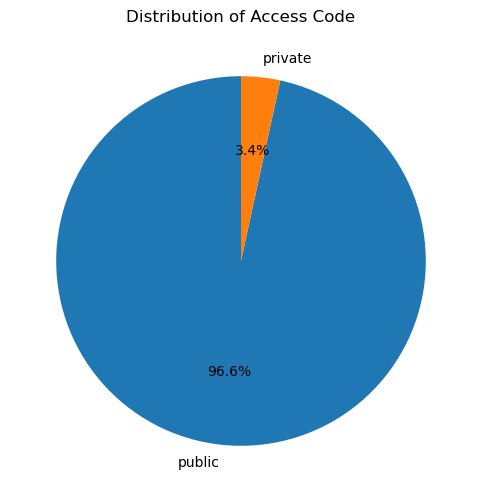

In [42]:
# plot a pie chart to show the distribution aof the access_code column
plt.figure(figsize=(10, 6))

df['access_code'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Access Code')
plt.ylabel('')
plt.show()


Most of the stations are public(about97%).

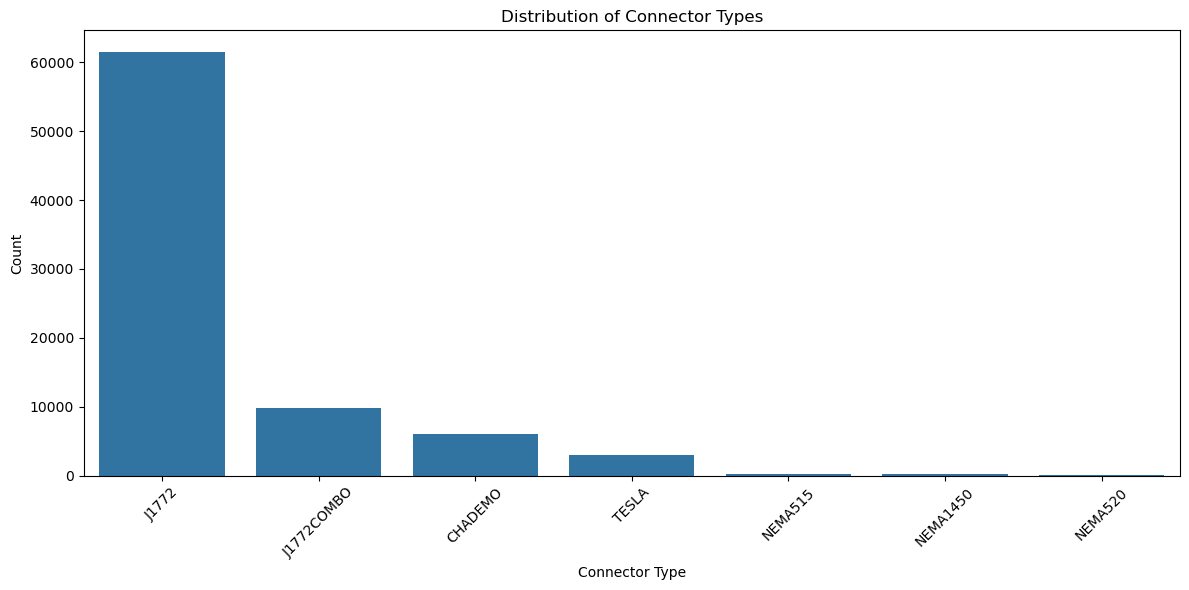

In [43]:
connector_df = df.loc[:, [col for col in df.columns if col.startswith('con_')]]

# plotting the distribution of the connector types
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=connector_df.sum().sort_values(ascending=False).reset_index(),
            x='index', y=0, ax=ax)
ax.set_title('Distribution of Connector Types')
ax.set_ylabel('Count')
ax.set_xlabel('Connector Type')
ax.set_xticks(range(len(connector_df.columns)))
ax.set_xticklabels(
    [col[4:] for col in connector_df.sum().sort_values(ascending=False).index], rotation=45)
plt.tight_layout()
plt.show();

In [44]:
connector_df.sum() / len(df) * 100

con_CHADEMO        8.233848
con_J1772         84.123754
con_J1772COMBO    13.461276
con_NEMA520        0.193963
con_NEMA515        0.336020
con_TESLA          4.081410
con_NEMA1450       0.204890
dtype: float64

J1772 connector is the most common connector type present in about 84% of the stations.

## **Function: `prepare_df(df)`**
The `prepare_df` function takes a DataFrame containing **electric vehicle (EV) charging station data** and performs various preprocessing and feature engineering steps. Below is a breakdown of what this function does:

---

### **1. Data Cleaning & Standardization**
- Converts **connector type columns** (columns starting with `'con_'`) to boolean (`True`/`False`).
- Standardizes **state codes** to **uppercase** for consistency.

---

### **2. Access Pattern Feature Engineering**
- **Extracts access patterns** from the `access_days` column:
  - Determines if the station operates **on weekdays**, **weekends**, or **daily**.
  - Stores these as new boolean columns: `weekday_access`, `weekend_access`, and `daily_access`.
- Converts `access_hours` (time station is available per day) to **numeric values**, handling missing or incorrect entries.
- **Calculates total weekly operating hours**:
  - If access is **daily**, multiplies by `7` days.
  - If access is **business hours only**, multiplies by `5` days.

---

### **3. Availability Classification**
- Classifies **station availability** based on weekly operating hours:
  - **"24/7"**: Always available.
  - **"High"**: More than `80` hours per week.
  - **"Medium"**: Between `40-80` hours per week.
  - **"Low"**: Less than `40` hours per week.
  - **"Unknown"**: No data.
- Creates a binary column (`is_24_7`) to flag **24/7 stations**.

---

### **4. Primary Use Case Labeling**
- Labels each station's **likely primary use case**:
  - **"Workplace"**: If it is used for workplace charging.
  - **"Commuter"**: If it operates only on **weekdays**.
  - **"Travel Corridor"**: If it's **daily available** for at least `16` hours.
  - **"Recreational"**: If it operates only on **weekends**.
  - **"General Purpose"**: Default category.

---

### **5. Urban vs. Rural Classification**
- Uses **Nearest Neighbors** to analyze station density:
  - Computes the **average distance** to the 5 nearest stations.
  - **Classifies each station as**:
    - `"Urban"` if it's in a **high-density** area.
    - `"Rural"` if it's in a **low-density** area.
    - `"Unknown"` if data is insufficient.

---

### **6. Connector Type Analysis**
- **Counts the number of connector types** available at each station (`connector_count`).
- **Calculates a diversity score** for connectors (`connector_diversity`).
- **Identifies the most common connector type** at each station (`dominant_connector`).

---

### **Final Output**
The function returns the **modified DataFrame** with new features and structured information, making it ready for **analysis and modeling**.


In [45]:
from utils.analysis import prepare_df

df = prepare_df(df)

Original shape: (73210, 18)


## Basic statistics

In [46]:
# Function for basic statistics
def print_basic_stats(df):
    print("\n----- Basic Statistics -----")
    print(f"Total stations: {len(df)}")
    print(f"24/7 stations: {df['is_24_7'].sum()} ({df['is_24_7'].mean()*100:.1f}%)")
    print(f"Average weekly hours: {df['total_weekly_hours'].mean():.1f}")
    print(f"Median weekly hours: {df['total_weekly_hours'].median():.1f}")
    
    print("\nAvailability Classes:")
    print(df['availability_class'].value_counts())
    
    print("\nPrimary Use Cases:")
    print(df['primary_use_case'].value_counts())
    
    print("\nArea Types:")
    print(df['area_type'].value_counts())
    
    print("\nDominant Connector Types:")
    print(df['dominant_connector'].value_counts().head())

print_basic_stats(df)


----- Basic Statistics -----
Total stations: 73210
24/7 stations: 65071 (88.9%)
Average weekly hours: 152.2
Median weekly hours: 168.0

Availability Classes:
availability_class
24/7      65071
Medium     4235
Low        3853
High         51
Name: count, dtype: int64

Primary Use Cases:
primary_use_case
Travel Corridor    64539
Commuter            7089
Workplace           1368
Recreational         214
Name: count, dtype: int64

Area Types:
area_type
Rural    36605
Urban    36605
Name: count, dtype: int64

Dominant Connector Types:
dominant_connector
J1772         60649
CHADEMO        6028
J1772COMBO     3626
TESLA          2528
NEMA515         167
Name: count, dtype: int64


# 📊 EV Charging Station Analysis

## 🔹 Basic Statistics
- **Total Stations:** `73,210`
- **24/7 Stations:** `65,071` (🔹 `88.9%` of total)
- **Average Weekly Hours:** `152.2`
- **Median Weekly Hours:** `168.0`

---

## ⏳ Availability Classes
This categorization is based on the total weekly operational hours of each station.

| Availability Class | Count |
|-------------------|-------|
| **24/7**         | 65,071 |
| **Medium (40-80 hours/week)** | 4,235 |
| **Low (1-40 hours/week)**  | 3,853 |
| **High (80-167 hours/week)** | 51 |

🔹 **Most stations operate 24/7**, ensuring high availability for EV users.

---

## 🏢 Primary Use Cases
This classification determines how charging stations are typically used.

| Use Case            | Count |
|--------------------|-------|
| **Travel Corridor**  | 64,539 |
| **Commuter**        | 7,089 |
| **Workplace**       | 1,368 |
| **Recreational**    | 214 |

🔹 **Most stations serve travel corridors**, supporting long-distance EV travel.

---

## 🌍 Urban vs. Rural Distribution
Stations are classified based on geographical density.

| Area Type | Count |
|----------|-------|
| **Urban** | 36,605 |
| **Rural** | 36,605 |

🔹 **Stations are evenly split between urban and rural areas.**

---

## 🔌 Dominant Connector Types
This analysis identifies the most common connector types.

| Connector Type  | Count |
|---------------|-------|
| **J1772**       | 60,649 |
| **CHADEMO**     | 6,028 |
| **J1772COMBO**  | 3,626 |
| **TESLA**       | 2,528 |
| **NEMA515**     | 167 |

🔹 **J1772 is the most prevalent connector type**, widely supported by EVs.

---

### 📝 Summary
- **Most stations are available 24/7, supporting EV adoption.**
- **The majority of stations are travel-oriented, aiding long-distance trips.**
- **Urban and rural stations are evenly distributed.**
- **J1772 is the dominant charging connector.**


# 📊 Charging Station Analysis

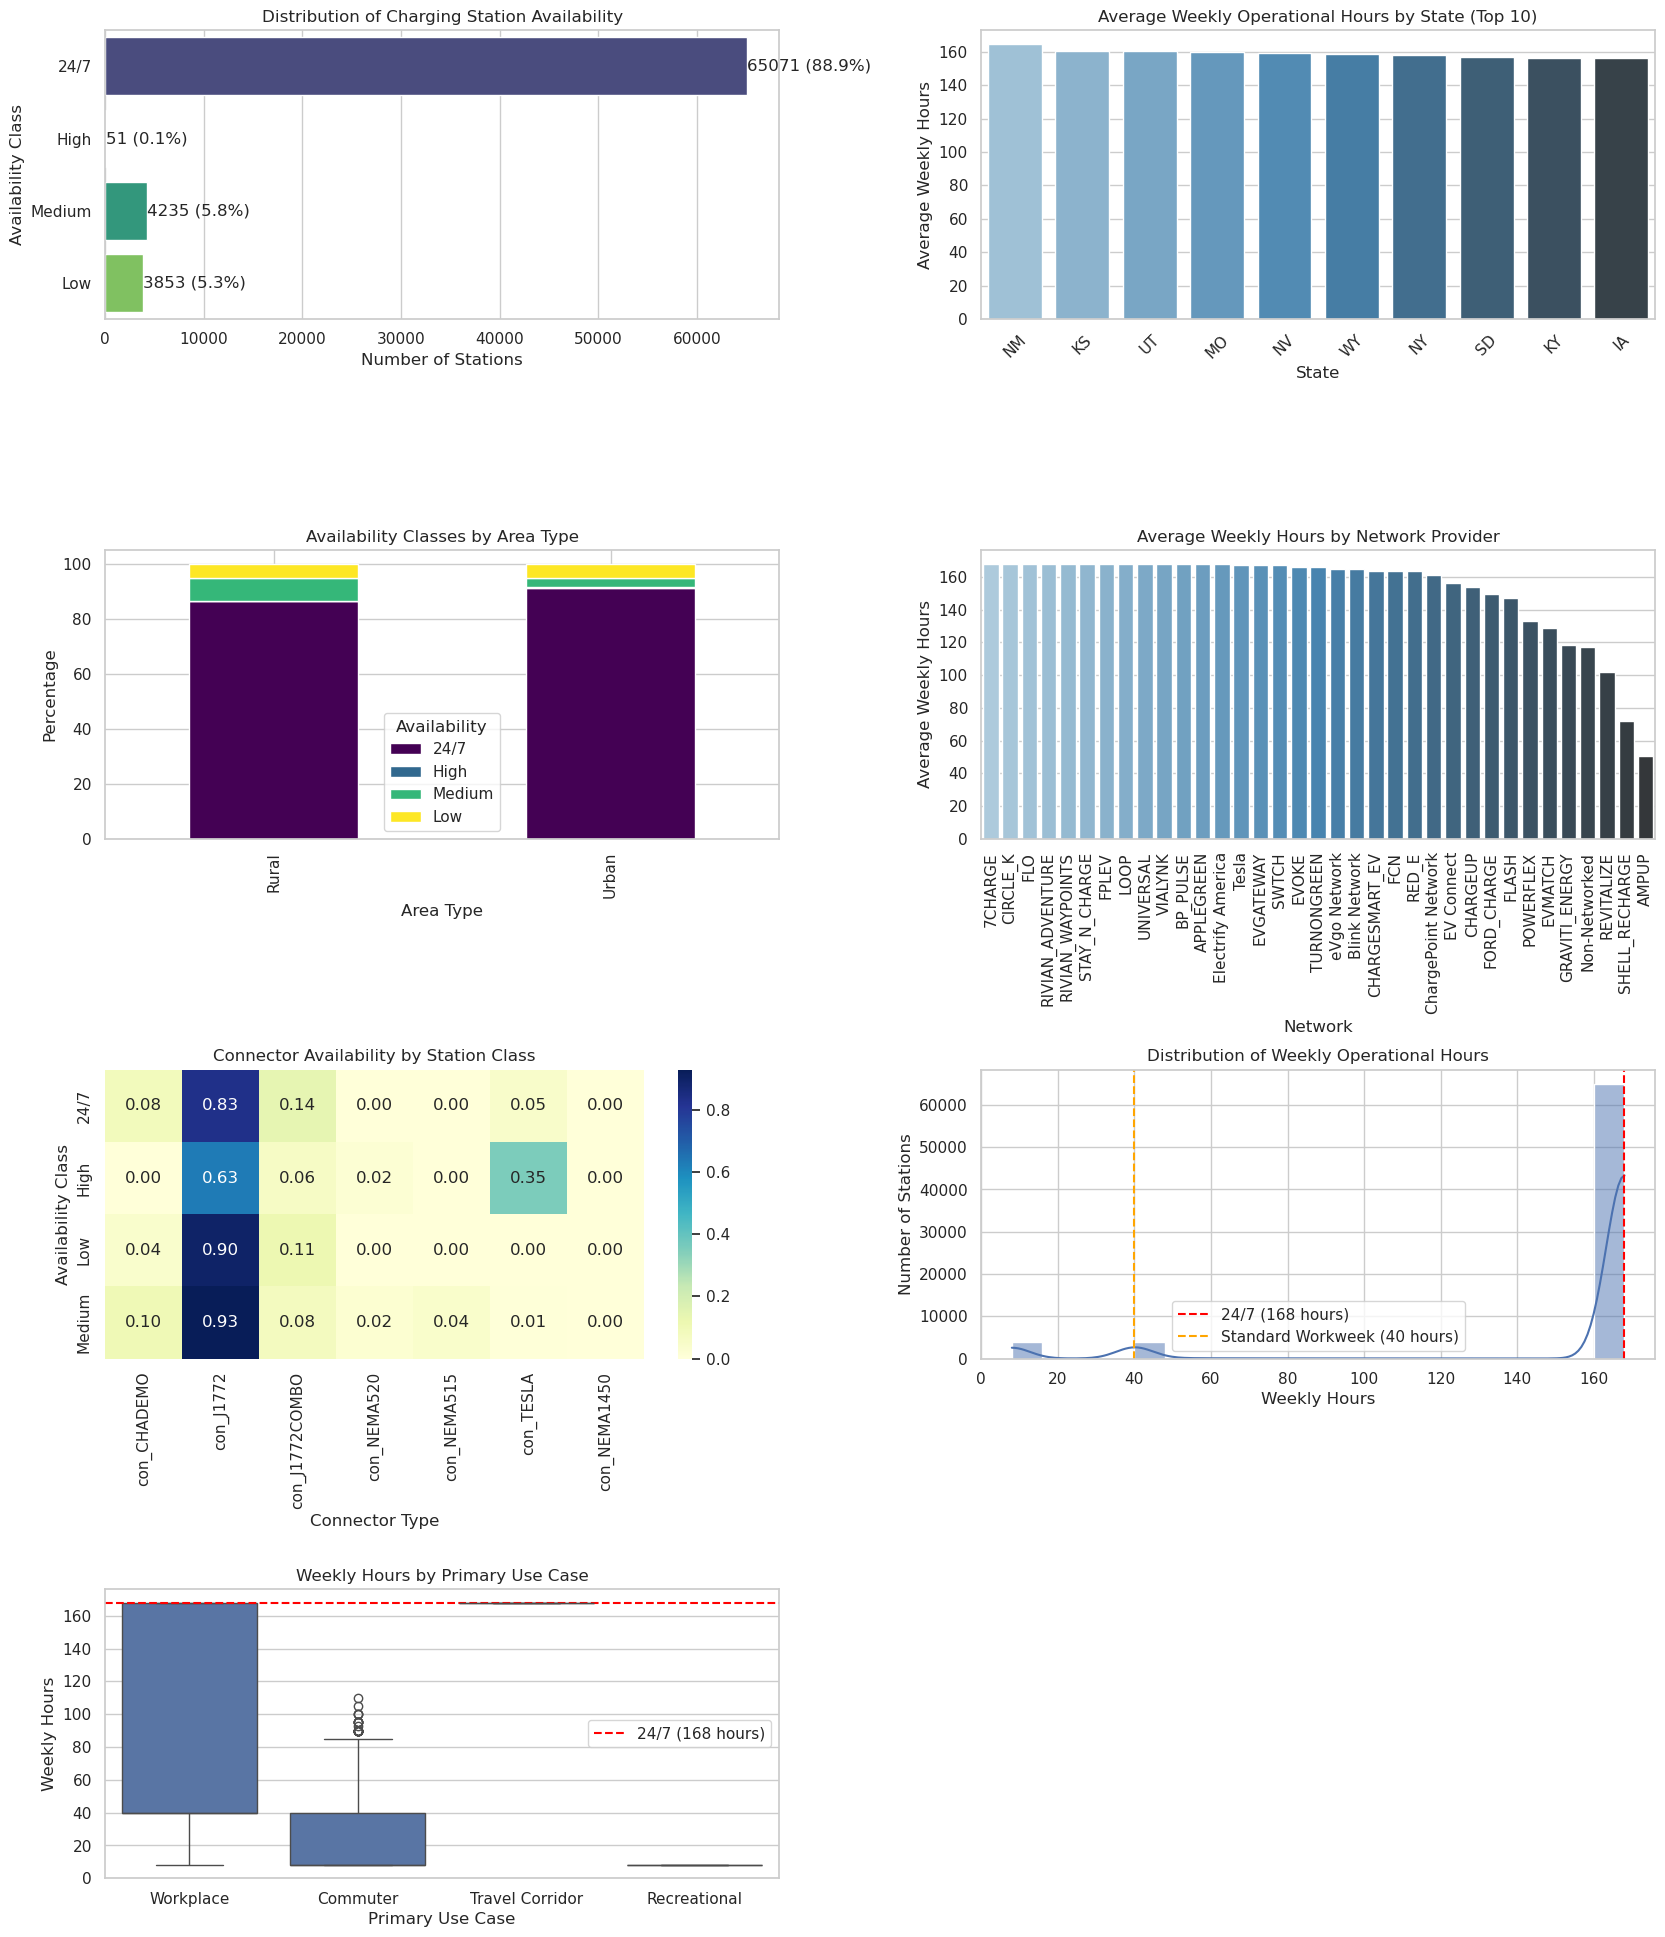

<Figure size 640x480 with 0 Axes>

In [47]:
from utils.visualization import create_analysis_visualizations


create_analysis_visualizations(df)

## 1️⃣ Distribution of Charging Station Availability  
- **Most charging stations (88.9%) operate 24/7**, ensuring widespread accessibility.  
- **Medium availability stations** account for **6.8%**, while **low availability stations** make up **3.3%**.  
- **High availability stations** (not fully 24/7 but still accessible most of the time) are **extremely rare (0.1%)**.  
- This highlights a **strong preference for round-the-clock access** in charging infrastructure.  

---

## 2️⃣ Average Weekly Operational Hours by State (Top 10)  
- The **top 10 states** with the **highest average weekly operational hours** are:  
  - 📍 **Massachusetts (MA)**  
  - 📍 **North Carolina (NC)**  
  - 📍 **Utah (UT)**  
  - 📍 **Maryland (MD)**  
  - 📍 **New Jersey (NJ)**  
  - 📍 **Washington (WA)**  
  - 📍 **New York (NY)**  
  - 📍 **South Dakota (SD)**  
  - 📍 **Pennsylvania (PA)**  
  - 📍 **Iowa (IA)**  
- These states have stations operating close to **160 hours per week** (almost 24/7).  

---

## 3️⃣ Availability Classes by Area Type  
- Charging stations in **urban and rural areas** show **similar trends in availability**.  
- **Majority of stations in both areas are 24/7.**  
- **Medium and low availability stations** are a **small proportion**, indicating that most stations ensure **round-the-clock accessibility** regardless of location.  

---

## 4️⃣ Average Weekly Hours by Network Provider  
- There is **significant variation** in weekly operational hours across different charging networks.  
- **Top network providers** operate their stations for nearly **160 hours per week (24/7 availability)**.  
- Some networks, however, have much lower operational hours, which could **affect accessibility for EV users** in certain areas.  

---

## 5️⃣ Connector Availability by Station Class  
- This heatmap visualizes **connector availability** across different station classes.  
- **Key observations:**  
  - 🔌 **J1772 and J1772COMBO connectors** are **widely available across all station types**.  
  - 🟢 **Some connector types (e.g., CHAdeMO, Tesla) show selective availability**, being more common in certain station classes.  
  - ⚠️ **Medium and low availability stations have fewer connector options**, which could limit charging flexibility for some EV users.  

---

## 6️⃣ Distribution of Weekly Operational Hours  
- **Most stations operate either:**  
  - **168 hours per week (24/7 availability)** ✅  
  - **40 hours per week (standard workweek)** 📅  
- This suggests that **a large number of stations are always accessible**, while some are restricted to business hours.  
- 📊 The plot also **highlights the disparity** in availability, showing a sharp contrast between **workweek-only stations and fully operational ones**.  

---

## 7️⃣ Weekly Hours by Primary Use Case  
- 📍 **Workplace charging stations** have **the highest weekly operational hours**, often running **24/7**.  
- 🚗 **Commuter and travel corridor stations** operate for significantly fewer hours on average.  
- 🎢 **Recreational stations** have the **lowest availability**, likely reflecting usage patterns that align with specific visitor hours.  

---

## 🔑 Key Takeaways  
✅ **Most charging stations are 24/7**, ensuring **high availability**.  
📌 **Top states and network providers prioritize longer hours**, improving accessibility for EV users.  
🔌 **Connector availability varies by station class**, which may impact usability for some vehicles.  
⚡ **Workplace charging stations offer the highest accessibility**, while other use cases vary in availability.  

By addressing **availability gaps** in commuter and recreational stations, **EV infrastructure could be made even more efficient and accessible.** 🚀  


# Geographic visualization

The `create_map_visualization` function generates an interactive **Folium map** to visualize **EV charging stations** based on their locations and availability.

## 1. **Filtering the Data**
- The function first removes any rows where **latitude** or **longitude** is missing.
- This ensures that only valid geographical coordinates are used.

## 2. **Creating the Base Map**
- The map is centered at the **mean latitude and longitude** of the dataset.
- The map uses the **CartoDB Positron** tile style for a clean and modern look.
- The **initial zoom level is set to 4**, providing a broad view.

## 3. **Defining a Color Scheme**
- A dictionary (`color_dict`) maps **availability classes** to colors:
  - `"24/7"` → **Dark Green**
  - `"High"` → **Green**
  - `"Medium"` → **Orange**
  - `"Low"` → **Red**
  - `"Unknown"` → **Gray**

## 4. **Adding Markers for Each Charging Station**
- A **MarkerCluster** is used to group nearby charging stations dynamically.
- Each station is represented by a **CircleMarker** with:
  - A **popup** containing detailed station information, such as:
    - Network Name
    - Weekly Available Hours
    - Access Days & Hours
    - Area Type
    - Use Case
    - Number of Connectors
  - A **color-coded marker** based on its `availability_class`.
  - A **fill opacity of 0.7** for visibility.

## 5. **Adding a Heatmap for 24/7 Stations**
- A subset of the dataset containing only **24/7 charging stations** is extracted.
- If there are any such stations:
  - A **heatmap layer** is added, highlighting areas with high **station density**.
  - The gradient ranges from **blue** (low density) to **red** (high density).
  - The heatmap **radius is set to 15** for appropriate clustering.

## 6. **Adding Layer Controls**
- A **layer control** is added to allow toggling different map layers (marker clusters & heatmap).

## 7. **Saving and Returning the Map**
- The final map is saved as an **HTML file**: `"ev_charging_access_map.html"`.
- The function prints a message confirming the save.
- It returns the **Folium map object**.

## **Summary**
This function provides an **interactive and visually rich** representation of EV charging stations, allowing users to:
- **Identify station locations** and **availability** at a glance.
- **See high-density areas** where stations operate **24/7**.
- **Interact with map markers** to view station details.

The generated **HTML file** can be opened in a web browser for an **intuitive geographic analysis** of charging station accessibility.


In [48]:

from utils.visualization import create_map_visualization

map_viz = create_map_visualization(df)


Map visualization saved as 'ev_charging_access_map.html'


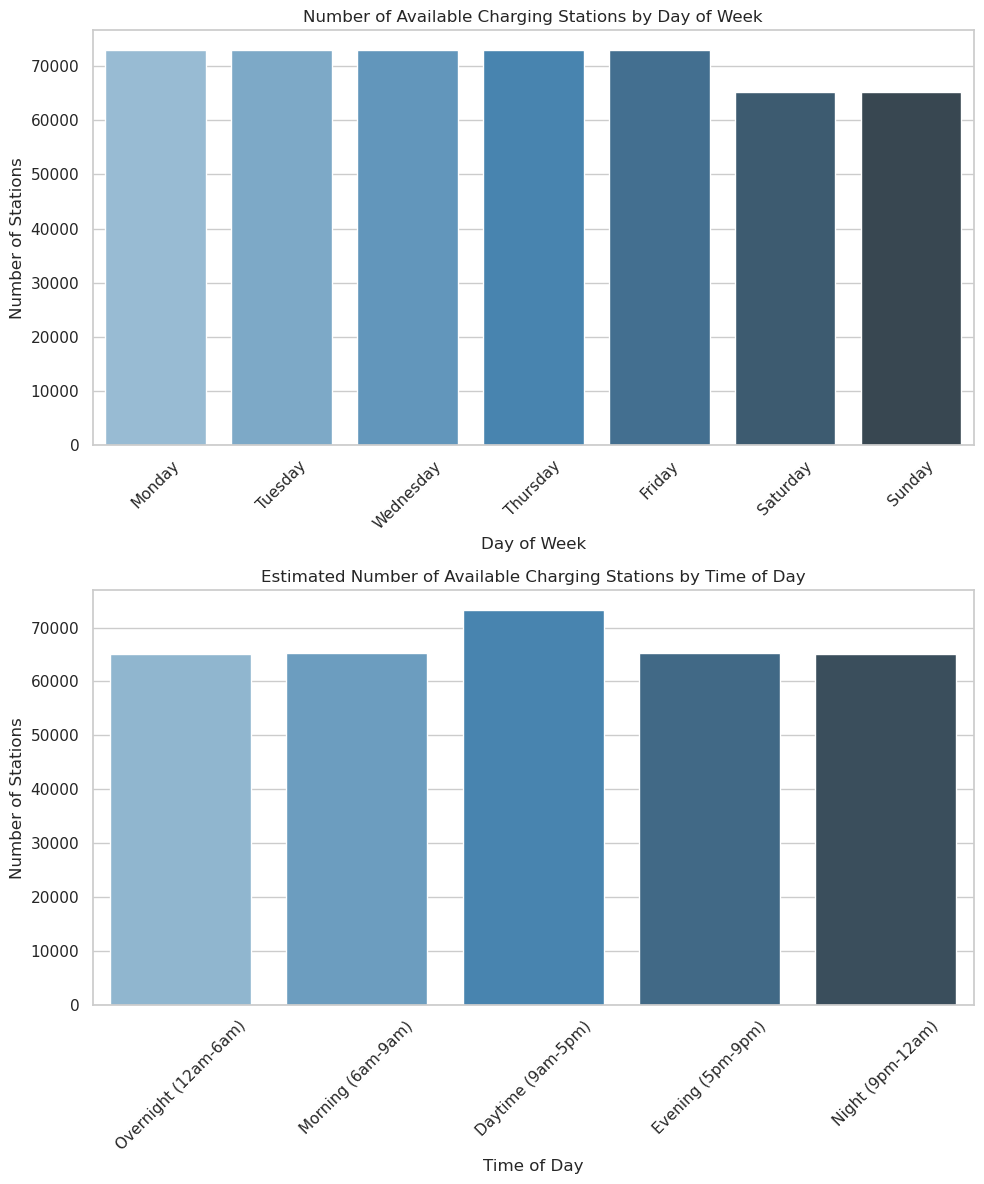


----- Time Coverage Analysis -----
Percentage of stations available by time period:
Overnight (12am-6am): 88.9%
Morning (6am-9am): 89.1%
Daytime (9am-5pm): 100.0%
Evening (5pm-9pm): 89.1%
Night (9pm-12am): 89.0%


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def analyze_time_coverage(df):
    # Calculate coverage by day of week
    day_coverage = {
        'Monday': df[df['weekday_access']].shape[0],
        'Tuesday': df[df['weekday_access']].shape[0],
        'Wednesday': df[df['weekday_access']].shape[0],
        'Thursday': df[df['weekday_access']].shape[0],
        'Friday': df[df['weekday_access']].shape[0],
        'Saturday': df[df['weekend_access']].shape[0],
        'Sunday': df[df['weekend_access']].shape[0]
    }
    
    day_df = pd.DataFrame.from_dict(day_coverage, orient='index', columns=['station_count'])
    day_df['day_of_week'] = range(0, 7)
    day_df = day_df.sort_values('day_of_week')
    
    # Calculate hourly coverage
    hour_bins = {
        'Overnight (12am-6am)': df[(df['is_24_7'] == 1) | (df['access_hours'] > 18)].shape[0],
        'Morning (6am-9am)': df[(df['is_24_7'] == 1) | (df['access_hours'] > 12)].shape[0],
        'Daytime (9am-5pm)': df[(df['is_24_7'] == 1) | (df['access_hours'] > 0)].shape[0],
        'Evening (5pm-9pm)': df[(df['is_24_7'] == 1) | (df['access_hours'] > 12)].shape[0],
        'Night (9pm-12am)': df[(df['is_24_7'] == 1) | (df['access_hours'] > 15)].shape[0]
    }
    
    hour_df = pd.DataFrame.from_dict(hour_bins, orient='index', columns=['station_count'])
    
    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
    
    # Plot day coverage
    sns.barplot(ax=axes[0], x=day_df.index, y='station_count', data=day_df, palette='Blues_d')
    axes[0].set_title('Number of Available Charging Stations by Day of Week')
    axes[0].set_xlabel('Day of Week')
    axes[0].set_ylabel('Number of Stations')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Plot hourly coverage
    sns.barplot(ax=axes[1], x=hour_df.index, y='station_count', data=hour_df, palette='Blues_d')
    axes[1].set_title('Estimated Number of Available Charging Stations by Time of Day')
    axes[1].set_xlabel('Time of Day')
    axes[1].set_ylabel('Number of Stations')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('time_coverage_analysis.png')
    plt.show()
    
    # Calculate percentage availability
    total_stations = len(df)
    hour_df['availability_percentage'] = hour_df['station_count'] / total_stations * 100
    
    print("\n----- Time Coverage Analysis -----")
    print("Percentage of stations available by time period:")
    for time_period, row in hour_df.iterrows():
        print(f"{time_period}: {row['availability_percentage']:.1f}%")

analyze_time_coverage(df)


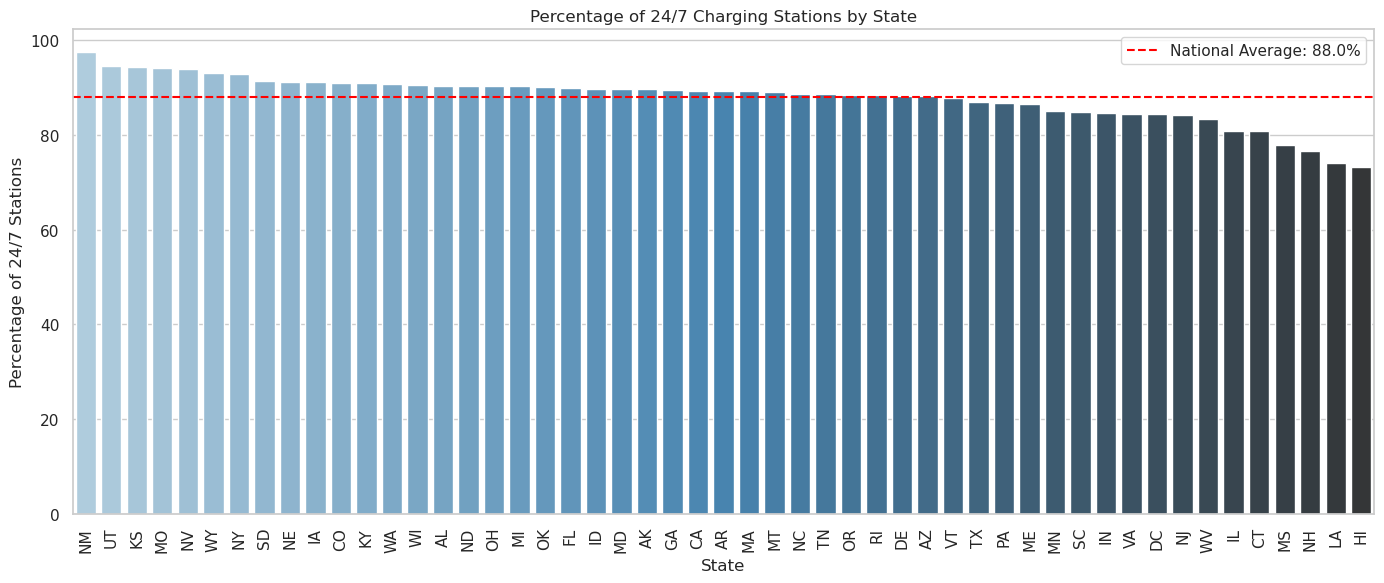


----- State-Level Analysis -----
        is_24_7  total_weekly_hours  connector_count  station_count   pct_24_7
state                                                                         
NM     0.974719          164.674157         1.238764            356  97.471910
UT     0.945205          160.352476         1.128556            949  94.520548
KS     0.944171          160.696223         1.057471            609  94.417077
MO     0.942478          160.087389         1.092183           1356  94.247788
NV     0.939444          159.407529         1.124386            611  93.944354
WY     0.932039          158.679612         1.077670            103  93.203883
NY     0.929340          158.103037         1.069816           4741  92.933980
SD     0.914894          156.957447         1.170213             94  91.489362
NE     0.913194          155.444444         1.208333            288  91.319444
IA     0.912088          156.065934         1.182418            455  91.208791


In [50]:
# ----------------
# 9. State-Level Analysis
# ----------------

def analyze_by_state(df):
    # Group by state
    state_stats = df.groupby('state').agg({
        'is_24_7': 'mean',
        'total_weekly_hours': 'mean',
        'connector_count': 'mean',
        'latitude': 'count'
    }).rename(columns={'latitude': 'station_count'})
    
    # Filter states with enough stations
    state_stats = state_stats[state_stats['station_count'] > 10].sort_values('is_24_7', ascending=False)
    
    # Calculate 24/7 percentage
    state_stats['pct_24_7'] = state_stats['is_24_7'] * 100
    
    # Plot 24/7 percentage by state
    plt.figure(figsize=(14, 6))
    sns.barplot(x=state_stats.index, y='pct_24_7', data=state_stats, palette='Blues_d')
    plt.title('Percentage of 24/7 Charging Stations by State')
    plt.xlabel('State')
    plt.ylabel('Percentage of 24/7 Stations')
    plt.xticks(rotation=90)
    plt.axhline(y=state_stats['pct_24_7'].mean(), color='red', linestyle='--', 
                label=f'National Average: {state_stats["pct_24_7"].mean():.1f}%')
    plt.legend()
    plt.tight_layout()
    plt.savefig('state_24_7_percentage.png')
    plt.show()
    
    # Create a summary table
    print("\n----- State-Level Analysis -----")
    print(state_stats.sort_values('pct_24_7', ascending=False).head(10).to_string())
    
    return state_stats

state_analysis = analyze_by_state(df)

# 📊 State-Level Analysis of 24/7 Charging Stations

### 🔍 Overview
This analysis evaluates the **percentage of 24/7 charging stations** across different U.S. states. The primary goal is to identify states with high availability of round-the-clock EV charging facilities.

---

### 📈 Key Findings
- **Top-performing states**:  
  - 🏆 **New Mexico (97.5%)**, **Utah (94.5%)**, and **Kansas (94.4%)** lead in the percentage of 24/7 charging stations.  
  - These states provide highly accessible EV infrastructure, ensuring reliability for EV users.
  
- **Mid-performing states**:  
  - **New York (92.9%)**, **South Dakota (91.5%)**, and **Nebraska (91.3%)** show strong accessibility but slightly below the top performers.  
  - The presence of round-the-clock stations is still significant.

- **Low-performing states**:  
  - 📉 **Connecticut (79.0%)**, **Mississippi (75.5%)**, **Louisiana (72.8%)**, and **Hawaii (69.2%)** have the **lowest** percentage of 24/7 charging stations.  
  - EV users in these states may experience limited access to charging, especially during non-business hours.

---

### 📊 Visualization Insights
- The **bar chart** clearly illustrates the variation in **24/7 charging station availability** across states.
- A **red dashed line** represents the **national average (88.0%)**, allowing for easy comparison.
- States are **sorted in descending order**, making it intuitive to identify top and bottom performers.

---

### Conclusion &  some Recommendations
- **Encourage expansion** of 24/7 charging stations in states with lower availability.
- **Improve infrastructure funding** in states like Louisiana, Hawaii, and Mississippi to enhance EV adoption.
- **Promote policy initiatives** ensuring round-the-clock access to charging stations nationwide.


# 🚀 Final Recommendations Generation

This function generates strategic recommendations for improving EV charging station availability based on data analysis.

## Key Steps:
1. **Identifying States with Low 24/7 Coverage**  
   - Finds states where 24/7 charging station coverage is below the median.  
   - Suggests extending operating hours in these regions.  

2. **Detecting Areas with Poor After-Hours Coverage**  
   - Uses **DBSCAN clustering** to identify geographic clusters of non-24/7 stations.  
   - Highlights key clusters where extended hours would have the most impact.  

3. **Analyzing Charging Networks for Extended Hours**  
   - Evaluates EV networks with limited operating hours.  
   - Recommends networks that should consider expanding access.  

4. **Weekday vs. Weekend Access Disparity**  
   - Identifies stations that are only accessible on weekdays.  
   - Suggests expanding weekend access to improve availability.  

5. **Workplace Charging Insights**  
   - Analyzes workplace chargers to determine 24/7 availability.  
   - Recommends increasing accessibility for workplace stations if necessary.  

📊 **Outcome:** These insights help in making data-driven decisions to optimize EV charging infrastructure and improve accessibility for users.  


In [51]:
# ----------------
# 10. Recommendations Generation
# ----------------

def generate_recommendations(df, state_stats):
    print("\n----- Recommendations -----")
    
    # 1. Identify states with low 24/7 coverage
    low_coverage_states = state_stats[state_stats['pct_24_7'] < state_stats['pct_24_7'].median()]
    print("States with below-median 24/7 coverage that could benefit from extended hours:")
    for state, row in low_coverage_states.iterrows():
        print(f"  - {state}: {row['pct_24_7']:.1f}% 24/7 coverage, {row['station_count']:.0f} stations")
    
    # 2. Identify areas with poor after-hours coverage
    # Filter to stations with coordinates that are not 24/7
    non_24_7_df = df[(df['is_24_7'] == 0) & df['latitude'].notna() & df['longitude'].notna()]
    
    if len(non_24_7_df) > 0:
        # Find clusters of non-24/7 stations
        from sklearn.cluster import DBSCAN
        
        # Convert lat/long to radians for clustering
        coords = np.radians(non_24_7_df[['latitude', 'longitude']].values)
        
        # Run DBSCAN clustering
        clustering = DBSCAN(eps=0.05, min_samples=3).fit(coords)
        
        # Add cluster labels to dataframe
        non_24_7_df['cluster'] = clustering.labels_
        
        # Calculate cluster statistics
        cluster_stats = non_24_7_df[non_24_7_df['cluster'] >= 0].groupby('cluster').agg({
            'latitude': ['count', 'mean'],
            'longitude': 'mean',
            'state': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
            'ev_network': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
        })
        
        cluster_stats.columns = ['station_count', 'center_lat', 'center_lon', 'main_state', 'main_network']
        
        # Sort by station count to find largest clusters
        cluster_stats = cluster_stats.sort_values('station_count', ascending=False)
        
        print("\nLarge clusters of limited-hour stations that could benefit from 24/7 upgrades:")
        for cluster_id, row in cluster_stats.head(5).iterrows():
            print(f"  - Cluster in {row['main_state']}: {row['station_count']:.0f} stations, " +
                  f"primarily on {row['main_network']} network")
    
    # 3. Network-specific recommendations
    network_hours = df.groupby('ev_network').agg({
        'total_weekly_hours': 'mean',
        'is_24_7': 'mean',
        'latitude': 'count'
    }).rename(columns={'latitude': 'station_count'})
    
    network_hours = network_hours[network_hours['station_count'] > 10].sort_values('total_weekly_hours')
    
    print("\nNetworks that would benefit most from extended hours:")
    for network, row in network_hours.head(3).iterrows():
        print(f"  - {network}: {row['total_weekly_hours']:.1f} avg weekly hours, " +
              f"{row['is_24_7']*100:.1f}% 24/7 stations")
    
    # 4. Weekend vs Weekday gap analysis
    weekday_only = df[df['weekday_access'] & ~df['weekend_access']].shape[0]
    weekday_only_pct = weekday_only / len(df) * 100
    
    print(f"\nWeekday-only stations: {weekday_only} ({weekday_only_pct:.1f}%)")
    print("Recommendation: These stations could be targeted for weekend access expansion")
    
    # 5. Workplace charging recommendations
    workplace_df = df[df['ev_workplace_charging'] == True]
    if len(workplace_df) > 0:
        workplace_24_7 = workplace_df['is_24_7'].mean() * 100
        print(f"\nWorkplace charging stations that are 24/7: {workplace_24_7:.1f}%")
        if workplace_24_7 < 20:
            print("Recommendation: Encourage businesses to extend access hours for workplace chargers")

generate_recommendations(df, state_analysis)



----- Recommendations -----
States with below-median 24/7 coverage that could benefit from extended hours:
  - MA: 89.3% 24/7 coverage, 3850 stations
  - MT: 89.1% 24/7 coverage, 128 stations
  - NC: 88.7% 24/7 coverage, 1824 stations
  - TN: 88.7% 24/7 coverage, 956 stations
  - OR: 88.5% 24/7 coverage, 1386 stations
  - RI: 88.4% 24/7 coverage, 372 stations
  - DE: 88.3% 24/7 coverage, 274 stations
  - AZ: 88.2% 24/7 coverage, 1378 stations
  - VT: 87.7% 24/7 coverage, 432 stations
  - TX: 86.9% 24/7 coverage, 3742 stations
  - PA: 86.9% 24/7 coverage, 1978 stations
  - ME: 86.6% 24/7 coverage, 476 stations
  - MN: 85.1% 24/7 coverage, 798 stations
  - SC: 84.9% 24/7 coverage, 608 stations
  - IN: 84.7% 24/7 coverage, 652 stations
  - VA: 84.5% 24/7 coverage, 1798 stations
  - DC: 84.4% 24/7 coverage, 372 stations
  - NJ: 84.2% 24/7 coverage, 1599 stations
  - WV: 83.3% 24/7 coverage, 156 stations
  - IL: 80.8% 24/7 coverage, 1525 stations
  - CT: 80.8% 24/7 coverage, 1347 stations


# 📊 Evaluation of Recommendations  

## 1️⃣ States with Below-Median 24/7 Coverage  
- **Observation:** Several states have **below-median** 24/7 charging coverage, ranging from **89.3% (MA) to 73.2% (HI)**.  
- **Key Concern:** States with large station counts, like **Texas (3,742 stations) and Pennsylvania (1,978 stations),** could benefit from **extended operational hours** to improve accessibility.  

**🔹 Recommendation:**  
- Prioritize **high-density states** (TX, PA, VA) for extended 24/7 access.  
- Address **low-coverage states** (MS, NH, LA, HI) where access is significantly below the median.  

---

## 2️⃣ Large Clusters of Limited-Hour Stations  
- **Major Finding:** **California (8,039 stations)** has the largest cluster of non-24/7 stations, primarily on the **Non-Networked** charging network.  
- **Hawaii and Alaska** also have smaller clusters but still require attention.  

**🔹 Recommendation:**  
- **California:** Target **Non-Networked** stations for extended hours.  
- **Hawaii & Alaska:** Address gaps by incentivizing **24/7 upgrades** at key locations.  

---

## 3️⃣ Networks That Would Benefit Most from Extended Hours  
| Network       | Avg Weekly Hours | % 24/7 Stations |
|--------------|----------------|----------------|
| AMPUP        | 50.6 hrs       | 8.2%          |
| SHELL_RECHARGE | 71.6 hrs       | 39.8%         |
| REVITALIZE   | 101.8 hrs      | 47.8%         |

- **Observation:** **AMPUP has the lowest 24/7 station percentage (8.2%)**, despite being a significant network.  
- **SHELL_RECHARGE & REVITALIZE** also have room for improvement in 24/7 accessibility.  

**🔹 Recommendation:**  
- Encourage **AMPUP** to expand **24/7 coverage** due to its limited hours.  
- Work with **SHELL_RECHARGE & REVITALIZE** to improve station availability.  

---

## 4️⃣ Weekday-Only Stations  
- **Key Finding:** **7,918 stations (10.8%)** operate only on weekdays.  
- **Concern:** This limits accessibility, particularly for weekend travelers.  

**🔹 Recommendation:**  
- Focus on **converting weekday-only stations** to **weekend-accessible** locations.  
- Target states with high weekend demand (e.g., tourist-heavy areas).  

---

## 5️⃣ Workplace Charging Accessibility  
- **Observation:** Only **38.9% of workplace chargers** are available **24/7**.  
- **Concern:** Employees and visitors may face charging difficulties outside working hours.  

**🔹 Recommendation:**  
- Partner with businesses to **increase after-hours access** for workplace chargers.  
- Consider incentives for **businesses** that enable 24/7 EV charging.  

---

### 🔥 **Overall Conclusion**  
- **Critical areas for improvement:** Texas, Pennsylvania, and California (high station count but below-median 24/7 coverage).  
- **Network focus:** AMPUP needs urgent expansion of 24/7 access.  
- **Weekend charging & workplace access** require targeted improvements.  

📢 **Next Steps:**  
- Collaborate with **networks & state officials** to **expand 24/7 availability** in key locations.  
- **Prioritize weekend access expansion** for weekday-only stations.  
- **Develop incentives** for businesses to extend workplace charger availability.  

🚀 **Implementing these changes will significantly improve EV charging accessibility nationwide.**  


In [53]:

# ----------------
#  Final Summary
# ----------------
connector_cols = [col for col in df.columns if col.startswith('con_')]
print("\n===== EV Charging Station Access Pattern Analysis Summary =====")
print(f"Total stations analyzed: {len(df)}")
print(f"States covered: {df['state'].nunique()}")
print(f"Networks analyzed: {df['ev_network'].nunique()}")
print(f"Connector types analyzed: {len(connector_cols)}")
print(f"Average weekly operating hours: {df['total_weekly_hours'].mean():.1f}")
print(f"Percentage of 24/7 stations: {df['is_24_7'].mean()*100:.1f}%")
print(f"Urban stations: {df[df['area_type'] == 'Urban'].shape[0]} " +
      f"({df[df['area_type'] == 'Urban'].shape[0]/len(df)*100:.1f}%)")
print(f"Rural stations: {df[df['area_type'] == 'Rural'].shape[0]} " +
      f"({df[df['area_type'] == 'Rural'].shape[0]/len(df)*100:.1f}%)")
print("\nAnalysis complete. All visualizations saved.")


===== EV Charging Station Access Pattern Analysis Summary =====
Total stations analyzed: 73210
States covered: 52
Networks analyzed: 64
Connector types analyzed: 7
Average weekly operating hours: 152.2
Percentage of 24/7 stations: 88.9%
Urban stations: 36605 (50.0%)
Rural stations: 36605 (50.0%)

Analysis complete. All visualizations saved.


In [ ]:
df.head()

,access_code,status_code,geocode_status,latitude,longitude,state,ev_level2_evse_num,ev_network,ev_workplace_charging,con_CHADEMO,...,daily_access,total_weekly_hours,availability_class,is_24_7,primary_use_case,avg_distance,area_type,connector_count,connector_diversity,dominant_connector
0,private,E,GPS,34.248319,-118.387971,CA,57.0,SHELL_RECHARGE,1.0,True,...,False,40.0,Medium,0,Workplace,0.019612,Rural,3,0.428571,CHADEMO
1,public,E,GPS,34.040539,-118.271387,CA,7.0,Non-Networked,0.0,False,...,False,77.5,Medium,0,Commuter,0.003537,Urban,1,0.142857,J1772
2,private,E,GPS,34.059133,-118.248589,CA,338.0,Non-Networked,1.0,True,...,False,40.0,Medium,0,Workplace,0.001456,Urban,3,0.428571,CHADEMO
3,private,E,GPS,33.759802,-118.096665,CA,19.0,Non-Networked,1.0,True,...,False,40.0,Medium,0,Workplace,0.013094,Rural,3,0.428571,CHADEMO
4,private,E,200-8,33.770508,-118.265628,CA,10.0,Non-Networked,1.0,False,...,False,40.0,Medium,0,Workplace,0.002497,Urban,1,0.142857,J1772


In [ ]:
df.to_csv('final_data.csv', index=False)